# Wissensbasierte Systeme 
## ML-Übung #1 "Nächste Nachbarn" und "Random Forest"

**Dozenten:** Dr. Sina Keller, M.sc. Felix Riese

**Datum:** 22.11.2017

**Datensatz:** EnMAP-Contest, [Download der Daten](http://www2.ipf.kit.edu/Projekte/code/EnMAP_Contest.zip) mit [Beschreibung](https://www.ipf.kit.edu/downloads/Instructions_EnMAP_Contest.pdf)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import h5py
import matplotlib.pyplot as plt

### 1. Einlesen des Datensatzes
Der Datensatz `EnMAP_Contest_Data.mat` wurde heruntergeladen in das Verzeichnis dieses Notebooks.

In [2]:
datadict = {}
with h5py.File("EnMAP_Contest_Data.mat", 'r') as f:
    for k, v in f.items():
        datadict[k] = np.array(v)

print(datadict.keys())

dict_keys(['Im', 'cm', 'lx', 'ly', 'xi', 'yi'])


In [3]:
print("{var:<4} | {val:<20}".format(var="Var", val="Shape"))
for key in datadict.keys():
    print("{var:<4} | {val:<20}".format(var=key, val=str(len(datadict[key]))+" x " + str(len(datadict[key][0]))))

Var  | Shape               
Im   | 244 x 1000000       
cm   | 3 x 21              
lx   | 1 x 2617            
ly   | 1 x 1124            
xi   | 244 x 2617          
yi   | 244 x 1124          


### Überblick über den Datensatz
- Ein paar Zeilen anschauen mit .head(5) und .tail(5)
- Größe des Datensatzes und Anzahl möglicher Klassen herausfinden
- Datensatz geeignet visualisieren in mehreren Plots
- Karte "Im" geeignet visualisieren mit entsprechender Klasse

In [4]:
x_t = datadict["xi"].transpose()
y_t = datadict["lx"].flatten()
x_e = datadict["yi"].transpose()
y_e = datadict["ly"].flatten()
i_p = datadict["Im"].transpose()[:1000000]

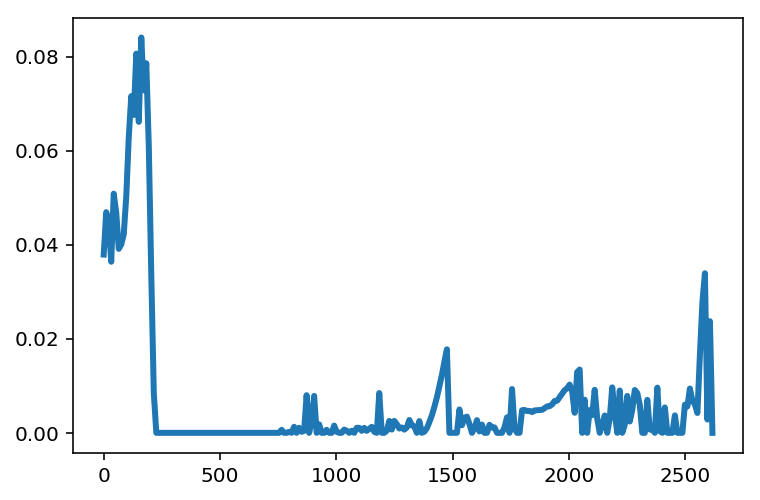

In [5]:
x = np.linspace(0, len(x_t), len(x_t[0]))
y = x_t[0]
plt.plot(x, y, linewidth=3)
plt.show()

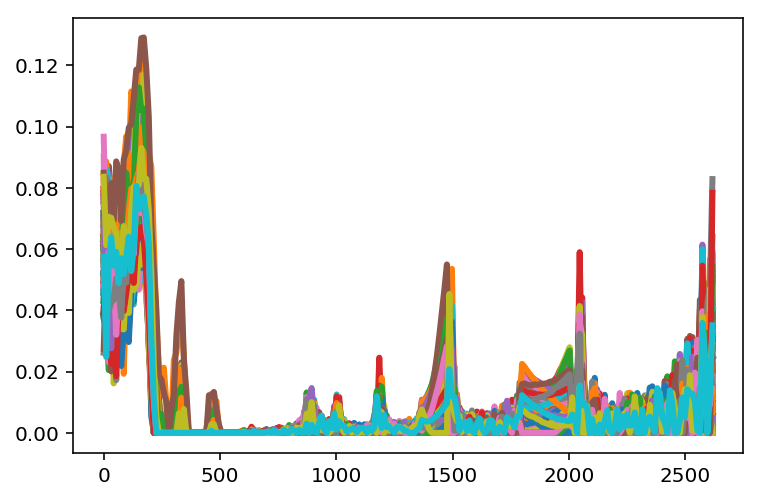

In [6]:
for i in range(len(x_t)):
    if(datadict["lx"][0][i] == 1):
        xindex = np.linspace(0, len(x_t), len(x_t[0]))
        yindex = x_t[i]
        plt.plot(xindex, yindex, linewidth=3)
plt.show()

<function matplotlib.pyplot.show>

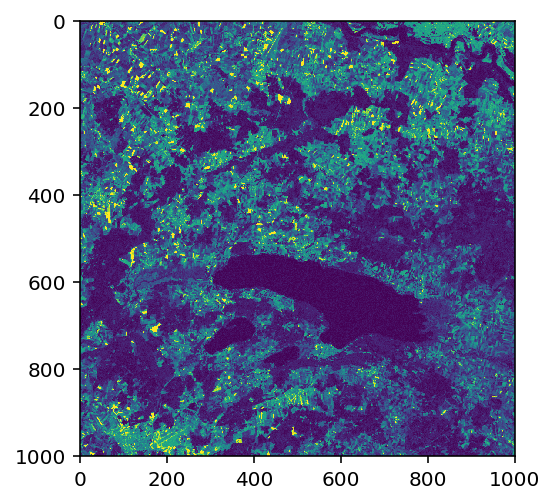

In [7]:
data = datadict["Im"][243]
plt.imshow(data.reshape((1000,1000)))
plt.show

In [8]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0)
model_rf.fit(x_t, datadict["lx"][0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
from sklearn.metrics import accuracy_score
y_pred=model_rf.predict(x_e)
print("Accuracy score for Random Forest =", accuracy_score(datadict["ly"][0], y_pred))

Accuracy score for Random Forest = 0.825622775801


In [10]:
from sklearn import neighbors
model_nn = neighbors.KNeighborsClassifier()
model_nn.fit(x_t, y_t)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
from sklearn.metrics import accuracy_score
y_p = model_nn.predict(x_e)
print("NN Accuracy score for KNeighbors = ", accuracy_score(y_e, y_p))

NN Accuracy score for KNeighbors =  0.82206405694


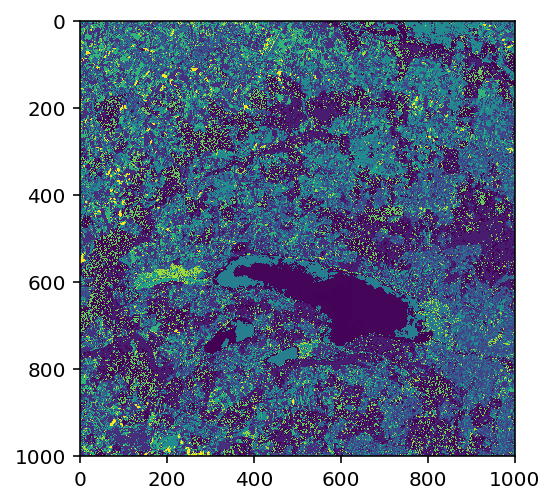

In [13]:
img_classes = model_rf.predict(i_p)
img_colors = []
for i in range(len(img_classes)):
    img_colors.append(datadict["cm"][0][int(img_classes[i])])

img = np.asarray(img_colors)
plt.imshow(img.reshape((1000,1000)))
plt.show()


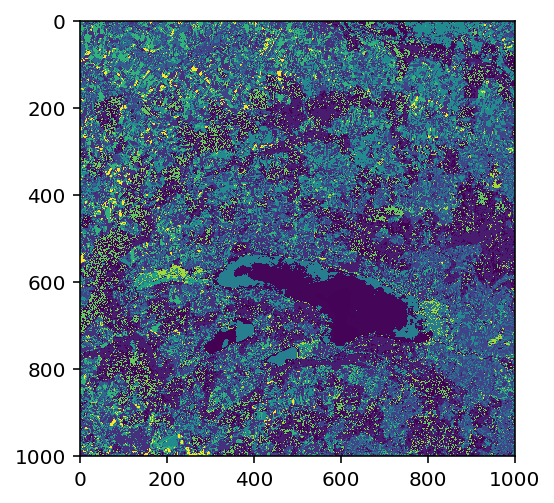

In [14]:
img_classes = model_nn.predict(i_p)
img_colors = []
for i in range(len(img_classes)):
    img_colors.append(datadict["cm"][0][int(img_classes[i])])

img = np.asarray(img_colors)
plt.imshow(img.reshape((1000,1000)))
plt.show()
